In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm
import scipy.stats
import fm2p
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 7

In [3]:
h5_path = r'K:\Mini2P\250306_DMM_DMM038_pillar\fm2\250306_DMM_DMM038_fm_2_preproc.h5'
data = fm2p.read_h5(h5_path)

In [3]:
def calc_modind(bins, tuning, fr, thresh=0.33):
    # modind of 0.33 is a doubling of firing rate relative

    # mean firing rate across the recording
    b = np.nanmean(fr)
    peak_val = np.nanmax(tuning)

    # print(b, peak_val)

    # diff over sum
    modind = (peak_val - b) / (peak_val + b)

    peak = np.nan
    if modind > 0.33:
        peak = bins[np.nanargmax(tuning)]

    return modind, peak

In [6]:
twopT = data['twopT']
egocentric = data['egocentric'].copy()
retinocentric = data['retinocentric'].copy()
pupil = data['pupil_from_head'].copy()

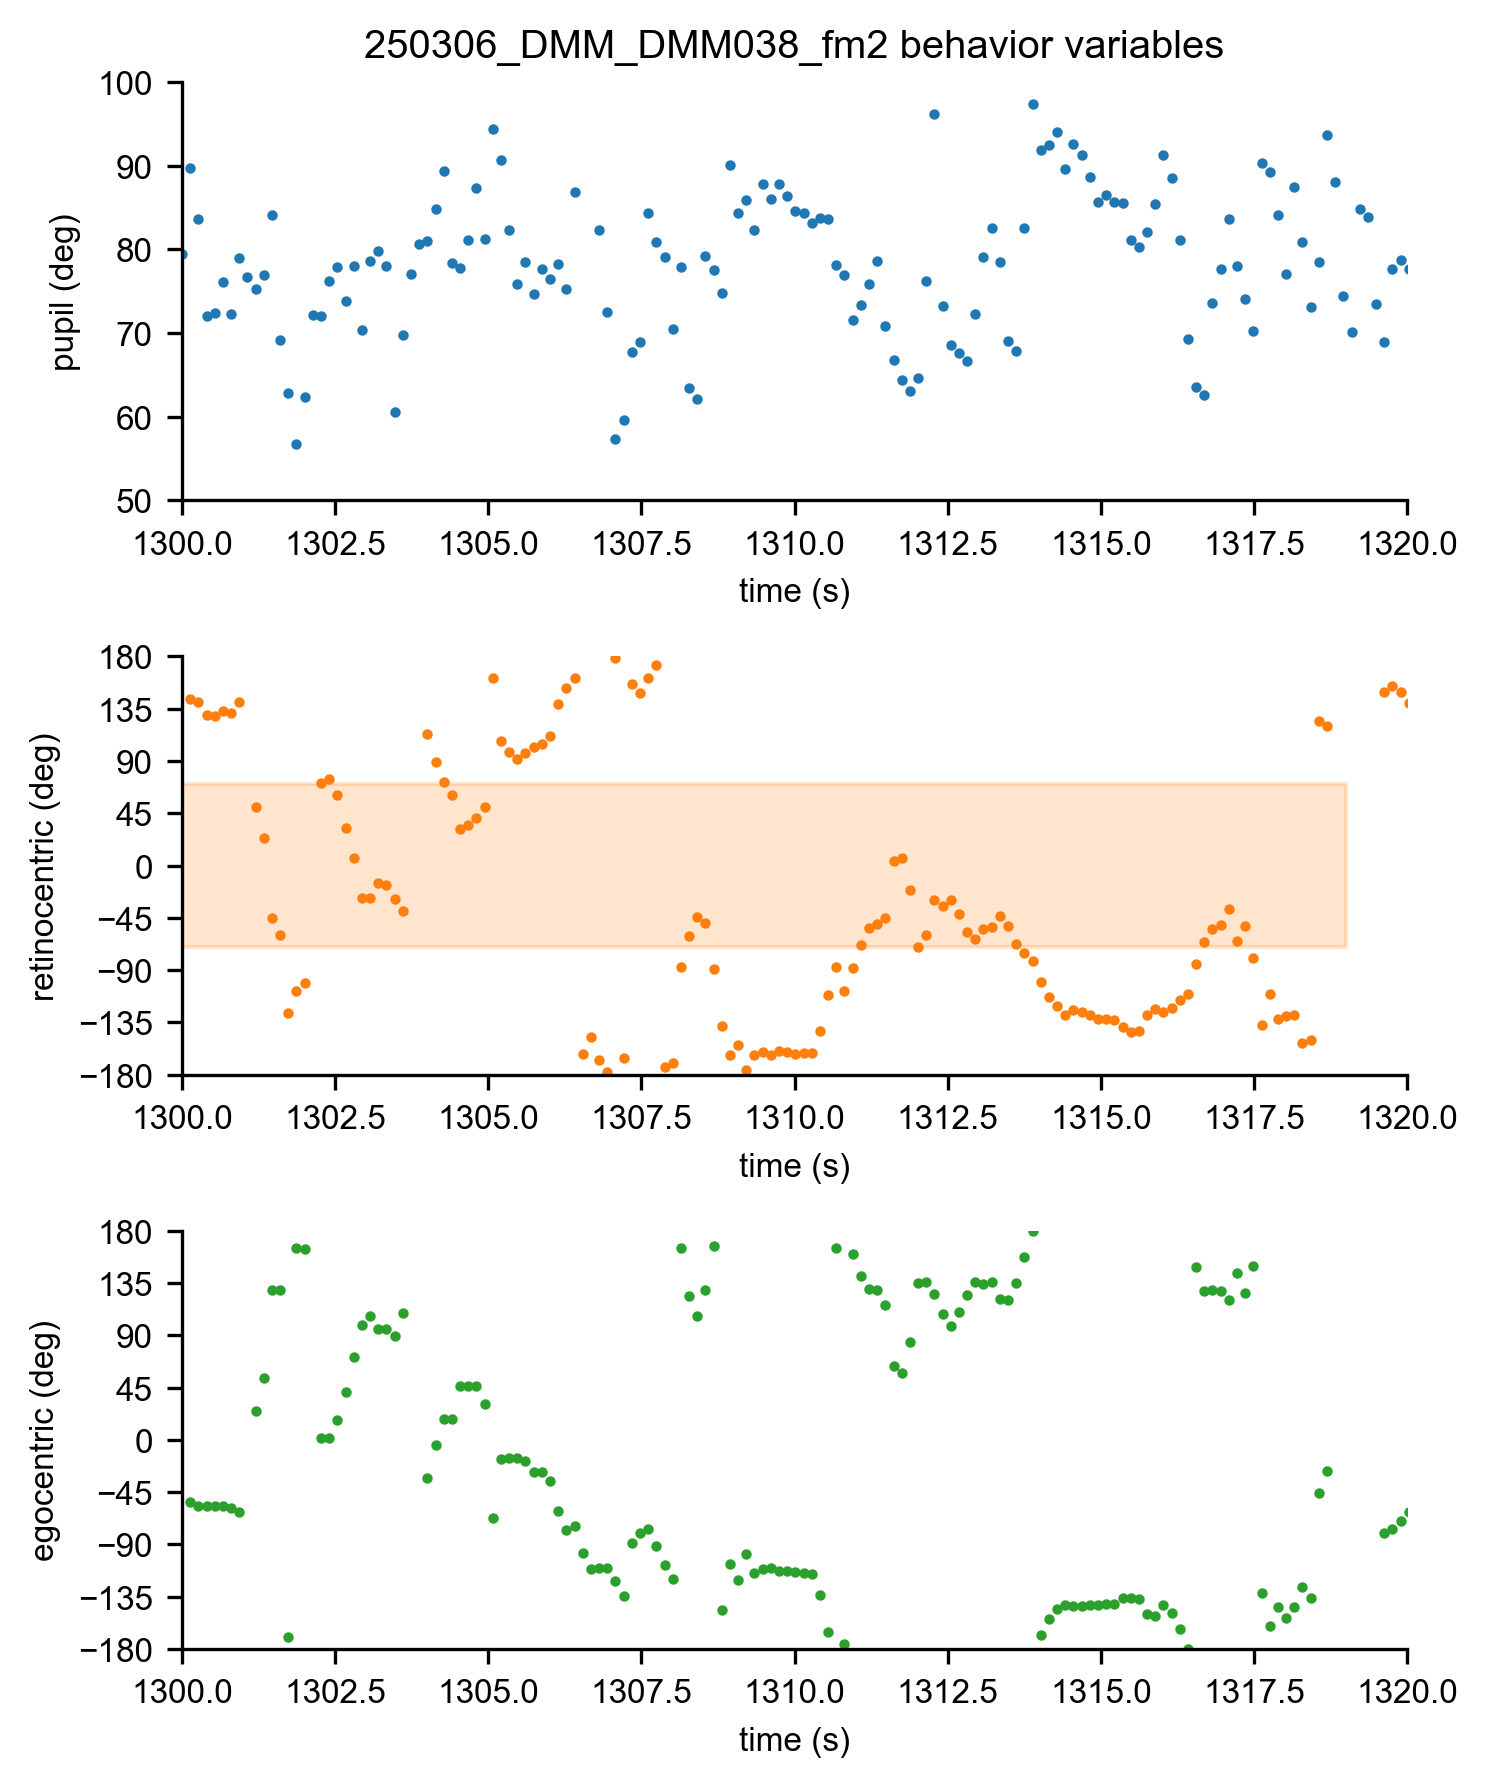

In [5]:
startT = 1300
endT = 1320
fig, [ax1,ax2,ax3] = plt.subplots(3,1, dpi=300, figsize=(5,6))
ax1.plot(twopT, pupil, '.', ms=3, color='tab:blue')
ax2.plot(twopT, retinocentric, '.', ms=3, color='tab:orange')
ax3.plot(twopT, egocentric, '.', ms=3, color='tab:green')
ax1.set_xlim([startT,endT])
ax2.set_xlim([startT,endT])
ax3.set_xlim([startT,endT])
ax2.fill_between(np.arange(startT, endT), -70, 70, alpha=0.2, color='tab:orange')
ax1.set_title('250306_DMM_DMM038_fm2 behavior variables')
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('time (s)')
    ax.set_ylim([-180,180])
ax1.set_ylim([50,100])
ax1.set_ylabel('pupil (deg)')
ax2.set_ylabel('retinocentric (deg)')
ax3.set_ylabel('egocentric (deg)')
ax2.set_yticks(np.arange(-180,180+45,45))
ax3.set_yticks(np.arange(-180,180+45,45))
fig.tight_layout()

In [6]:
for t in np.arange(1300,1320,1):
    ind, t = fm2p.find_closest_timestamp(twopT, t)
    if np.sum(np.isnan(np.array([pupil[ind], retinocentric[ind], egocentric[ind]])))==0:
        print('fr{} ({:.5}ms), p={:.4}\N{DEGREE SIGN}, r={:.4}\N{DEGREE SIGN}, e={:.4}\N{DEGREE SIGN}'.format(
            ind, t, pupil[ind], retinocentric[ind], egocentric[ind]))

fr9744 (1300.9ms), p=78.92°, r=140.7°, e=-61.73°
fr9752 (1302.0ms), p=62.39°, r=-101.4°, e=163.8°
fr9759 (1302.9ms), p=70.38°, r=-28.02°, e=98.4°
fr9767 (1304.0ms), p=81.04°, r=113.6°, e=-32.53°
fr9774 (1304.9ms), p=81.23°, r=50.68°, e=30.54°
fr9782 (1306.0ms), p=76.49°, r=111.7°, e=-35.25°
fr9789 (1306.9ms), p=72.52°, r=-177.5°, e=-110.0°
fr9797 (1308.0ms), p=70.53°, r=-169.6°, e=-119.9°
fr9804 (1308.9ms), p=90.09°, r=-163.1°, e=-106.9°
fr9812 (1310.0ms), p=84.6°, r=-161.9°, e=-113.5°
fr9819 (1310.9ms), p=71.57°, r=-88.36°, e=159.9°
fr9827 (1312.0ms), p=64.66°, r=-70.3°, e=135.0°
fr9834 (1313.0ms), p=72.31°, r=-63.52°, e=135.8°
fr9842 (1314.0ms), p=91.89°, r=-100.5°, e=-167.6°
fr9849 (1315.0ms), p=85.66°, r=-132.3°, e=-142.0°
fr9857 (1316.0ms), p=91.23°, r=-126.3°, e=-142.5°
fr9864 (1317.0ms), p=77.67°, r=-50.8°, e=128.5°
fr9872 (1318.0ms), p=77.04°, r=-129.8°, e=-153.1°


In [7]:
spikes = data['oasis_spks'].copy()

egocentric = data['egocentric'].copy()
retinocentric = data['retinocentric'].copy()
pupil = data['pupil_from_head'].copy()
speed = data['speed'].copy()
speed = np.append(speed, speed[-1])
use = speed > 2.


In [ ]:

ego_bins = np.linspace(-180, 180, 18)
retino_bins = np.linspace(-180, 180, 18)
pupil_bins = np.linspace(60, 95, 12)

lag_vals = np.array([-3,-2,-1,0,1,2,3,4,5])

spiketrains = np.zeros([
    np.size(spikes,0),
    np.sum(use)
]) * np.nan

# break data into 10 chunks, randomly choose ten of them for each block
ncnk = 10
_len = np.sum(use)
cnk_sz = _len // ncnk
_all_inds = np.arange(0,_len)
chunk_order = np.arange(ncnk)
np.random.shuffle(chunk_order)

split1_inds = []
split2_inds = []

for cnk_i, cnk in enumerate(chunk_order[:(ncnk//2)]):
    _inds = _all_inds[(cnk_sz*cnk) : ((cnk_sz*(cnk+1)))]
    split1_inds.extend(_inds)

for cnk_i, cnk in enumerate(chunk_order[(ncnk//2):]):
    _inds = _all_inds[(cnk_sz*cnk) : ((cnk_sz*(cnk+1)))]
    split2_inds.extend(_inds)

split1_inds = np.array(np.sort(split1_inds))
split2_inds = np.array(np.sort(split2_inds))

pupil_xcorr = np.zeros([np.size(spikes, 0), len(lag_vals)]) * np.nan
retino_xcorr = np.zeros([np.size(spikes, 0), len(lag_vals)]) * np.nan
ego_xcorr = np.zeros([np.size(spikes, 0), len(lag_vals)]) * np.nan

pupil_tunings = np.zeros([np.size(spikes, 0), len(lag_vals), len(pupil_bins)-1]) * np.nan
ret_tunings = np.zeros([np.size(spikes, 0), len(lag_vals), len(retino_bins)-1]) * np.nan
ego_tunings = np.zeros([np.size(spikes, 0), len(lag_vals), len(ego_bins)-1]) * np.nan

# axis 2: pupil, retino, ego
# axis 3: modulation index, peak value
all_mods = np.zeros([np.size(spikes,0), len(lag_vals), 3, 2]) * np.nan

# pdf = PdfPages('250306_DMM_DMM038_pillar_fm2_revcorrRFs_v03.pdf')

for c_i in tqdm(range(np.size(spikes, 0))):

    fig, axs = plt.subplots(3, 9, dpi=300, figsize=(15,6))

    _maxtuning = 0

    for lag_ind, lag_val in enumerate(lag_vals):
        
        for cell_i in range(np.size(spikes,0)):
            spiketrains[cell_i,:] = np.roll(spikes[cell_i,:], shift=lag_val)[use]

        pupil_cent, pupil_tuning, pupil_err = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,:],
            pupil[use],
            pupil_bins
        )
        ret_cent, ret_tuning, ret_err = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,:],
            retinocentric[use],
            retino_bins
        )
        ego_cent, ego_tuning, ego_err = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,:],
            egocentric[use],
            ego_bins
        )

        fm2p.plot_tuning(axs[0,lag_ind], pupil_cent, pupil_tuning, pupil_err, 'tab:blue', False)
        fm2p.plot_tuning(axs[1,lag_ind], ret_cent, ret_tuning, ret_err, 'tab:orange', False)
        fm2p.plot_tuning(axs[2,lag_ind], ego_cent, ego_tuning, ego_err, 'tab:green', False)

        lag_str = (1/7.49) * 1000 * lag_val

        Pmod, Ppeak = calc_modind(pupil_cent, pupil_tuning, spiketrains[c_i,:])
        if np.isnan(Ppeak):
            axs[0,lag_ind].set_title('{:.4}ms\nmod={:.3}'.format(lag_str, Pmod))
        else:
            axs[0,lag_ind].set_title('{:.4}ms\nmod={:.3} peak={:.4}\N{DEGREE SIGN}'.format(lag_str, Pmod, Ppeak))
        
        Rmod, Rpeak = calc_modind(ret_cent, ret_tuning, spiketrains[c_i,:])
        if np.isnan(Rpeak):
            axs[1,lag_ind].set_title('{:.4}ms\nmod={:.3}'.format(lag_str, Rmod))
        else:
            axs[1,lag_ind].set_title('{:.4}ms\nmod={:.3} peak={:.4}\N{DEGREE SIGN}'.format(lag_str, Rmod, Rpeak))
        
        Emod, Epeak = calc_modind(ego_cent, ego_tuning, spiketrains[c_i,:])
        if np.isnan(Epeak):
            axs[2,lag_ind].set_title('{:.4}ms\nmod={:.3}'.format(lag_str, Emod))
        else:
            axs[2,lag_ind].set_title('{:.4}ms\nmod={:.3} peak={:.4}\N{DEGREE SIGN}'.format(lag_str, Emod, Epeak))

        all_mods[c_i, lag_ind, 0, :] = Pmod, Ppeak
        all_mods[c_i, lag_ind, 1, :] = Rmod, Rpeak
        all_mods[c_i, lag_ind, 2, :] = Emod, Epeak

        axs[0,lag_ind].set_xlabel('pupil (deg)')
        axs[1,lag_ind].set_xlabel('retino (deg)')
        axs[2,lag_ind].set_xlabel('ego (deg)')

        for x in [
            np.nanmax(pupil_tuning+pupil_err),
            np.nanmax(ret_tuning+ret_err),
            np.nanmax(ego_tuning+ego_err)]:
            if x > _maxtuning:
                _maxtuning = x

        pupil_tunings[c_i, lag_ind, :] = pupil_tuning
        ret_tunings[c_i, lag_ind, :] = ret_tuning
        ego_tunings[c_i, lag_ind, :] = ego_tuning

        _, pupil1_tuning, _ = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,split1_inds],
            pupil[use][split1_inds],
            pupil_bins
        )
        _, pupil2_tuning, _ = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,split2_inds],
            pupil[use][split2_inds],
            pupil_bins
        )
        pupil_xcorr[c_i, lag_ind], _ = scipy.stats.pearsonr(pupil1_tuning[0], pupil2_tuning[0])

        _, ret1_tuning, _ = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,split1_inds],
            retinocentric[use][split1_inds],
            retino_bins
        )
        _, ret2_tuning, _ = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,split2_inds],
            retinocentric[use][split2_inds],
            retino_bins
        )
        retino_xcorr[c_i, lag_ind], _ = scipy.stats.pearsonr(ret1_tuning[0], ret2_tuning[0])

        _, ego1_tuning, _ = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,split1_inds],
            egocentric[use][split1_inds],
            ego_bins
        )
        _, ego2_tuning, _ = fm2p.tuning_curve(
            spiketrains[c_i,:][np.newaxis,split2_inds],
            egocentric[use][split2_inds],
            ego_bins
        )
        ego_xcorr[c_i, lag_ind], _ = scipy.stats.pearsonr(ego1_tuning[0], ego2_tuning[0])

    axs = axs.flatten()
    for ax in axs:
        ax.set_ylim([0, _maxtuning])
        ax.set_ylabel('sp/s')

    fig.suptitle('cell {}'.format(c_i))

    fig.tight_layout()
    # pdf.savefig(fig)
    plt.close()

# pdf.close()

(array([ 2.,  3.,  2.,  5., 11., 18., 13., 18., 12., 15.]),
 array([-0.77997223, -0.60710443, -0.43423662, -0.26136881, -0.088501  ,
         0.0843668 ,  0.25723461,  0.43010242,  0.60297023,  0.77583803,
         0.94870584]),
 <BarContainer object of 10 artists>)

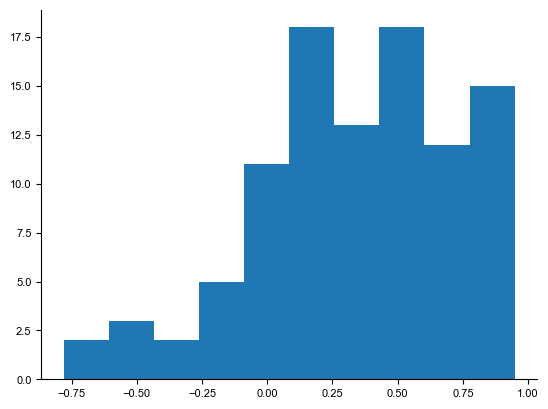

In [164]:
plt.hist([:,3])

In [162]:
response_peak = np.zeros([np.size(retino_xcorr,0), 3]) * np.nan
useccinds = np.zeros([np.size(retino_xcorr,0),3])

for c_i in range(np.size(retino_xcorr,0)):
    
    for lag_i in range(np.size(retino_xcorr,1)):
        if all_mods[c_i, lag_i, 0, 0] > 0.33:
            xcorr_across_lags[lag_i,0] = pupil_xcorr[c_i,lag_i]
        if all_mods[c_i, lag_i, 1, 0] > 0.33:
            xcorr_across_lags[lag_i,1] = p_xcorr[c_i,lag_i]
        if all_mods[c_i, lag_i, 2, 0] > 0.33:
            xcorr_across_lags[lag_i,2] = pupil_xcorr[c_i,lag_i]
    
    response_peak[c_i,i] = lag_vals[np.nanargmax(xcorr_across_lags[:,i])]
    useccinds[c_i,i] = 1

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

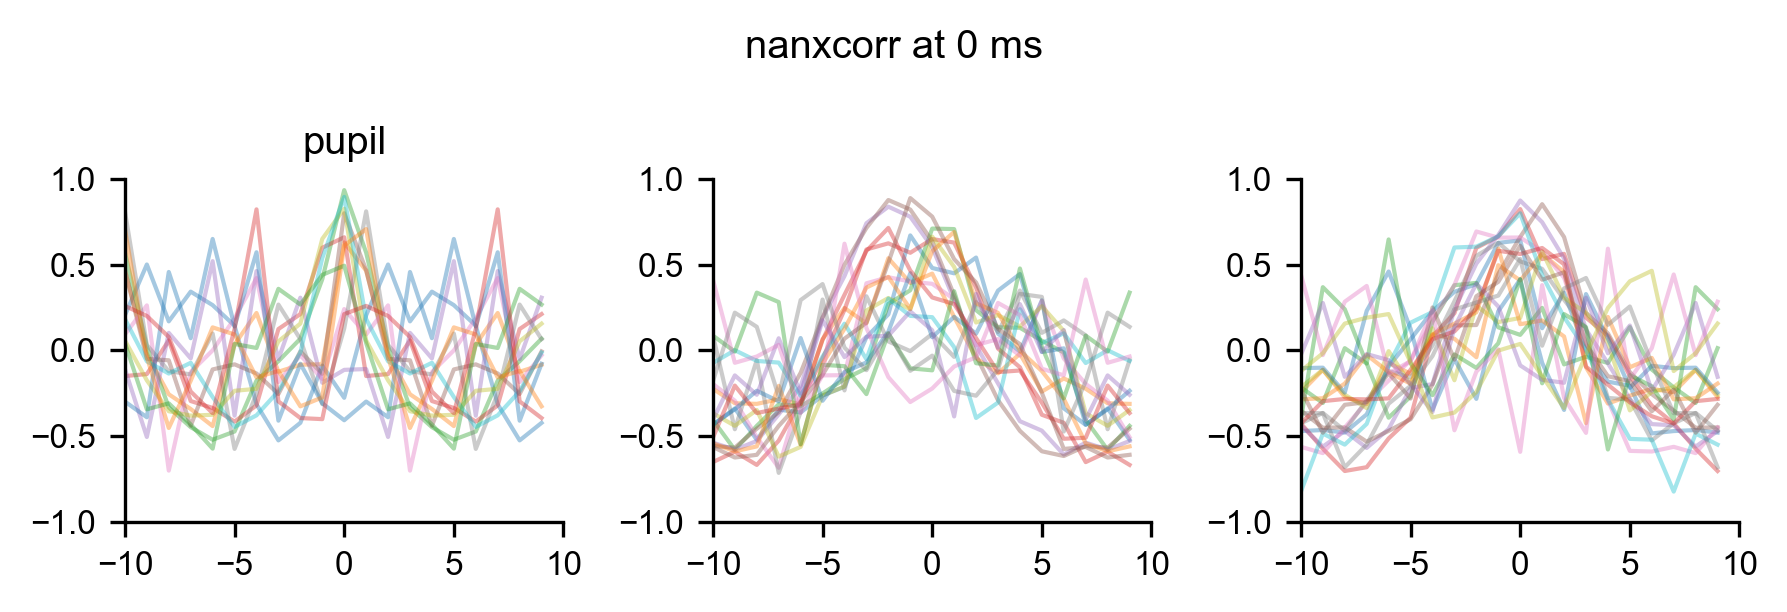

In [132]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(6,2), dpi=300)
for c_i in range(np.size(pupil_xcorr,0)):
    if useccinds[c_i,0]:
        ax1.plot(np.arange(-num_cc_bins//2,num_cc_bins//2), pupil_xcorr[c_i,3,:], alpha=0.4, lw=1)
    if useccinds[c_i,1]:
        ax2.plot(np.arange(-num_cc_bins//2,num_cc_bins//2), retino_xcorr[c_i,3,:], alpha=0.4, lw=1)
    if useccinds[c_i,2]:
        ax3.plot(np.arange(-num_cc_bins//2,num_cc_bins//2), ego_xcorr[c_i,3,:], alpha=0.4, lw=1)
for ax in [ax1,ax2,ax3]:
    ax.set_xlim([-num_cc_bins//2,num_cc_bins//2])
    ax.set_ylim([-1,1])
ax1.set_title('pupil')
fig.suptitle('nanxcorr at 0 ms')
fig.tight_layout()

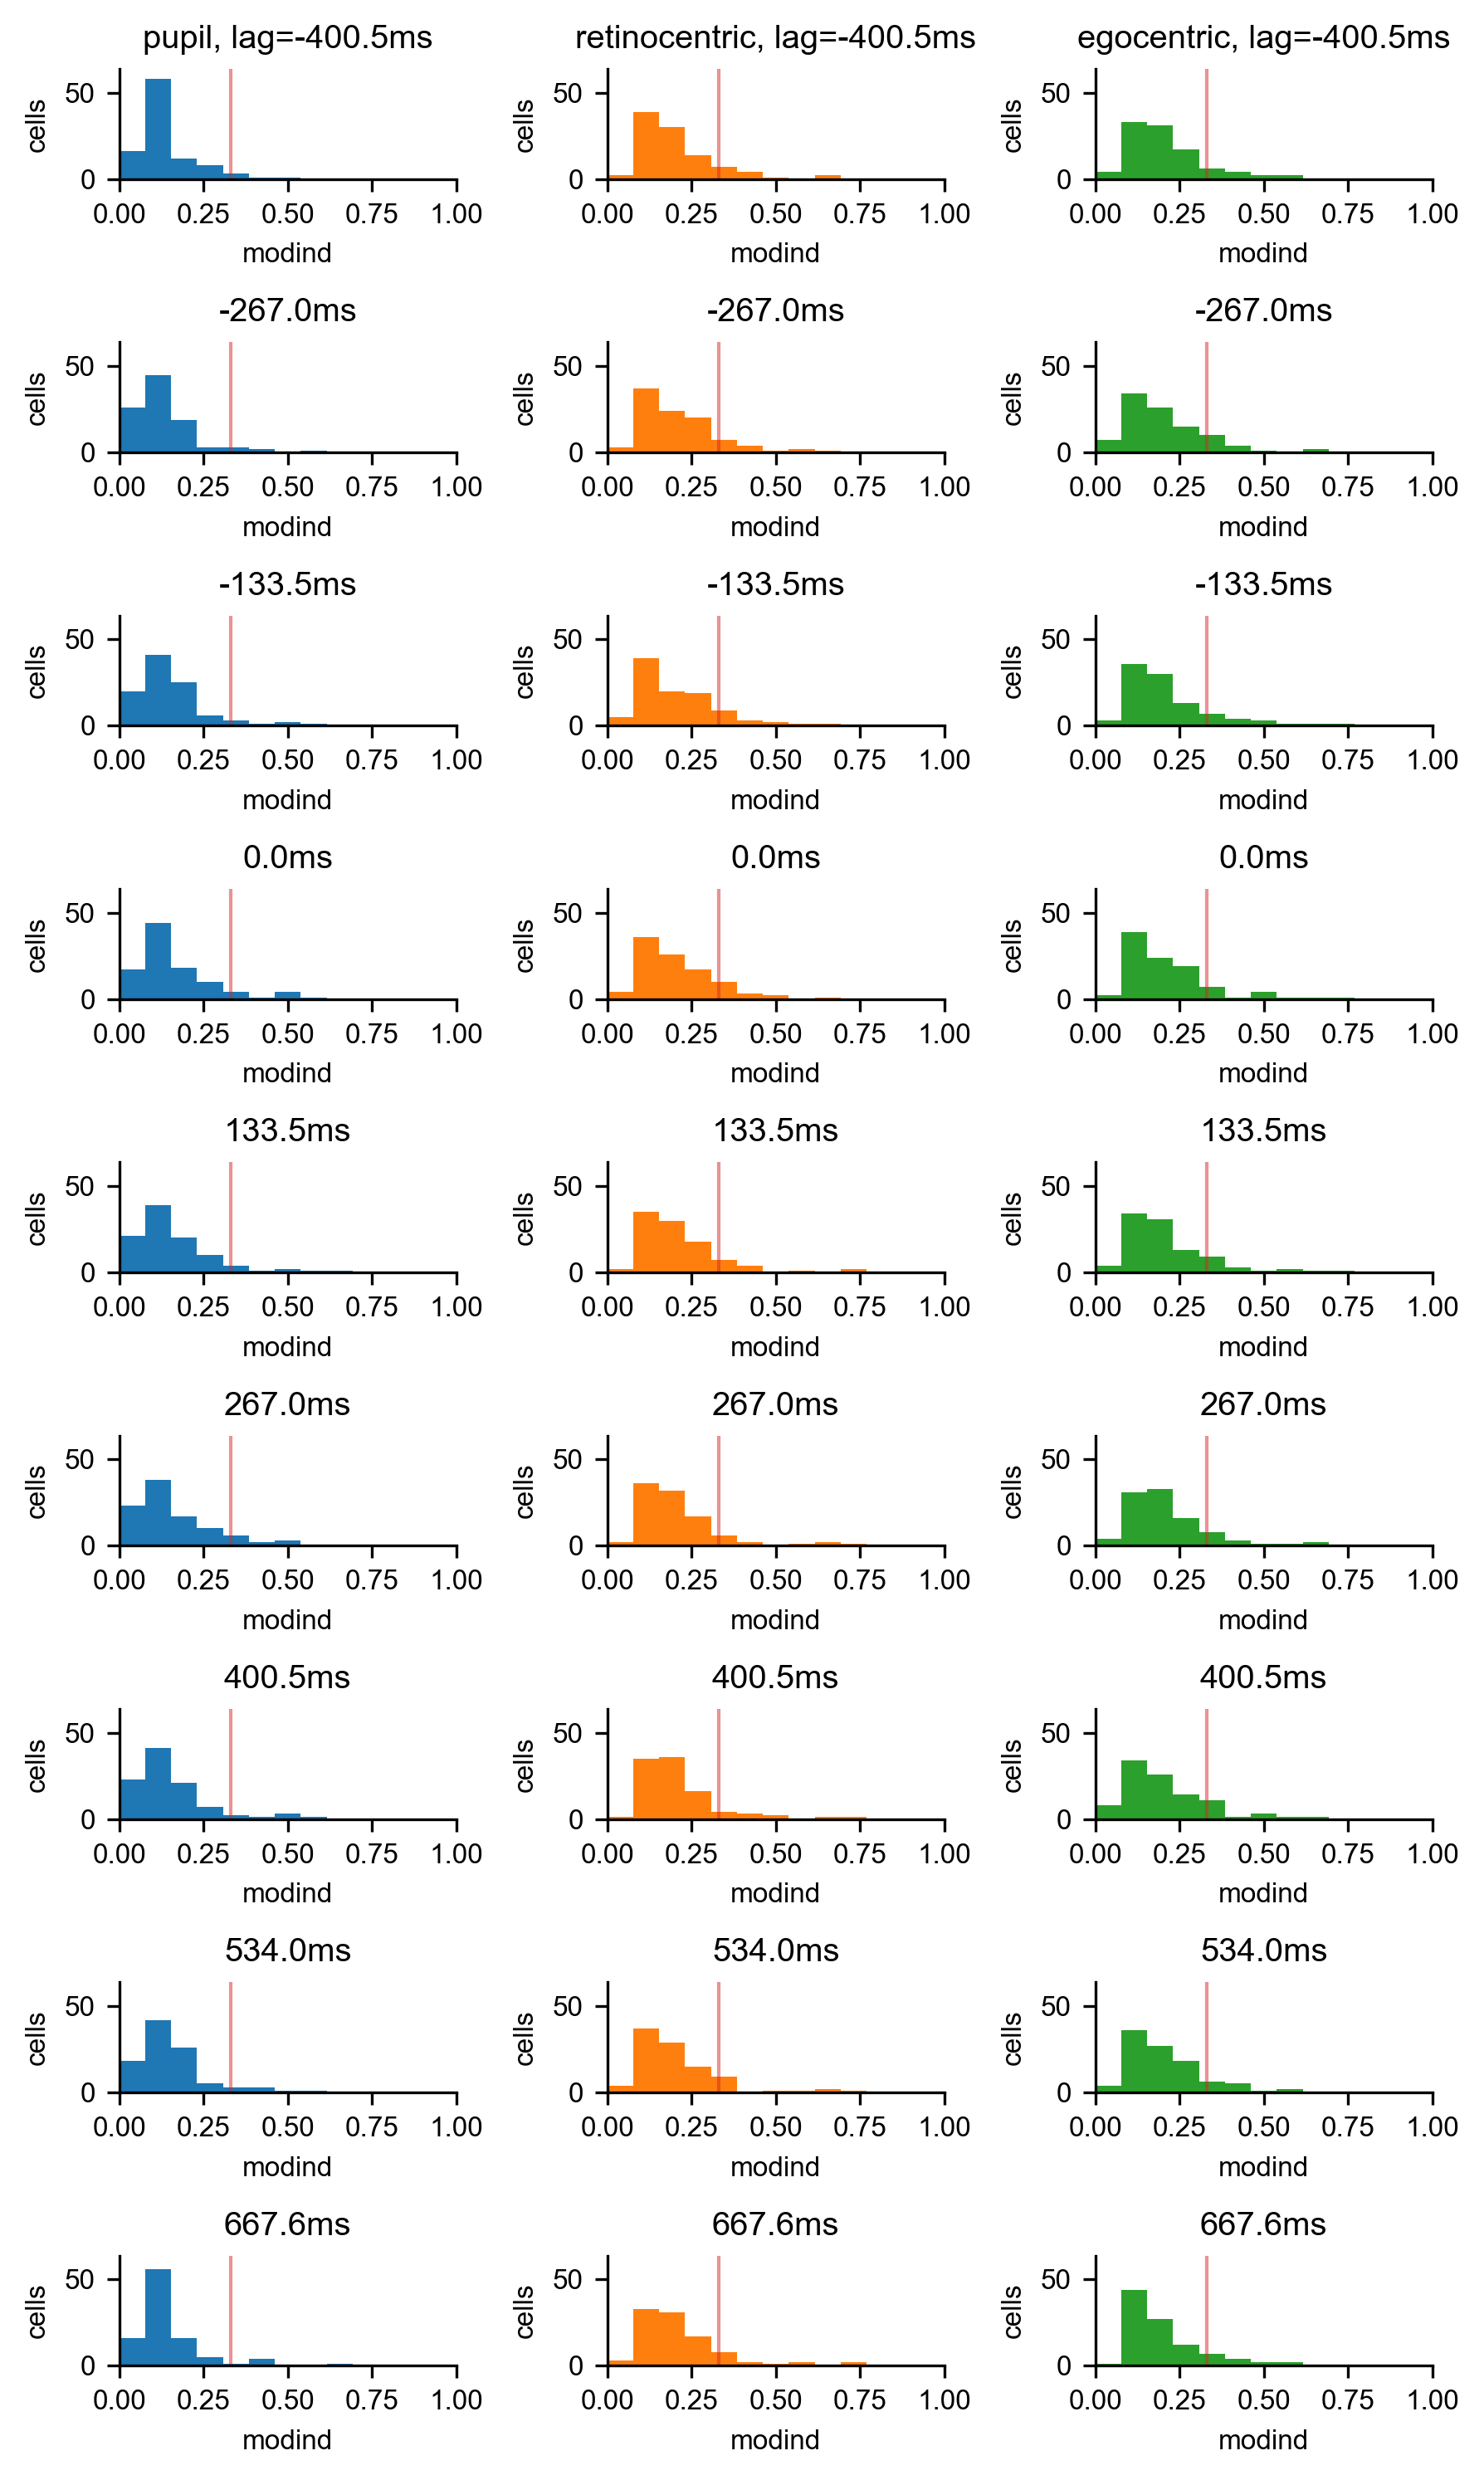

In [165]:
colcolors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(9,3, figsize=(6,10), dpi=300)
_setmax = 0
for lag_i, lagval in enumerate(lag_vals):
    lagval = (1/7.49) * 1000 * lagval
    for col in range(3):
        h = axs[lag_i,col].hist(all_mods[:,lag_i,col,0], color=colcolors[col], bins=np.linspace(0,1,14))
        if np.nanmax(h[0]) > _setmax:
            _setmax = np.nanmax(h[0])
        axs[lag_i,col].set_title('{:.4}ms'.format(lagval))
axs[0,0].set_title('pupil, lag={:.4}ms'.format((1/7.49) * 1000 * lag_vals[0]))
axs[0,1].set_title('retinocentric, lag={:.4}ms'.format((1/7.49) * 1000 * lag_vals[0]))
axs[0,2].set_title('egocentric, lag={:.4}ms'.format((1/7.49) * 1000 * lag_vals[0]))

axs = axs.flatten()
for ax in axs:
    ax.set_xlim([0,1])
    ax.set_ylim([0,_setmax*1.1])
    ax.vlines(0.33, 0, _setmax*1.1, color='tab:red', alpha=0.5, lw=1)
    ax.set_xlabel('modind')
    ax.set_ylabel('cells')
fig.tight_layout()

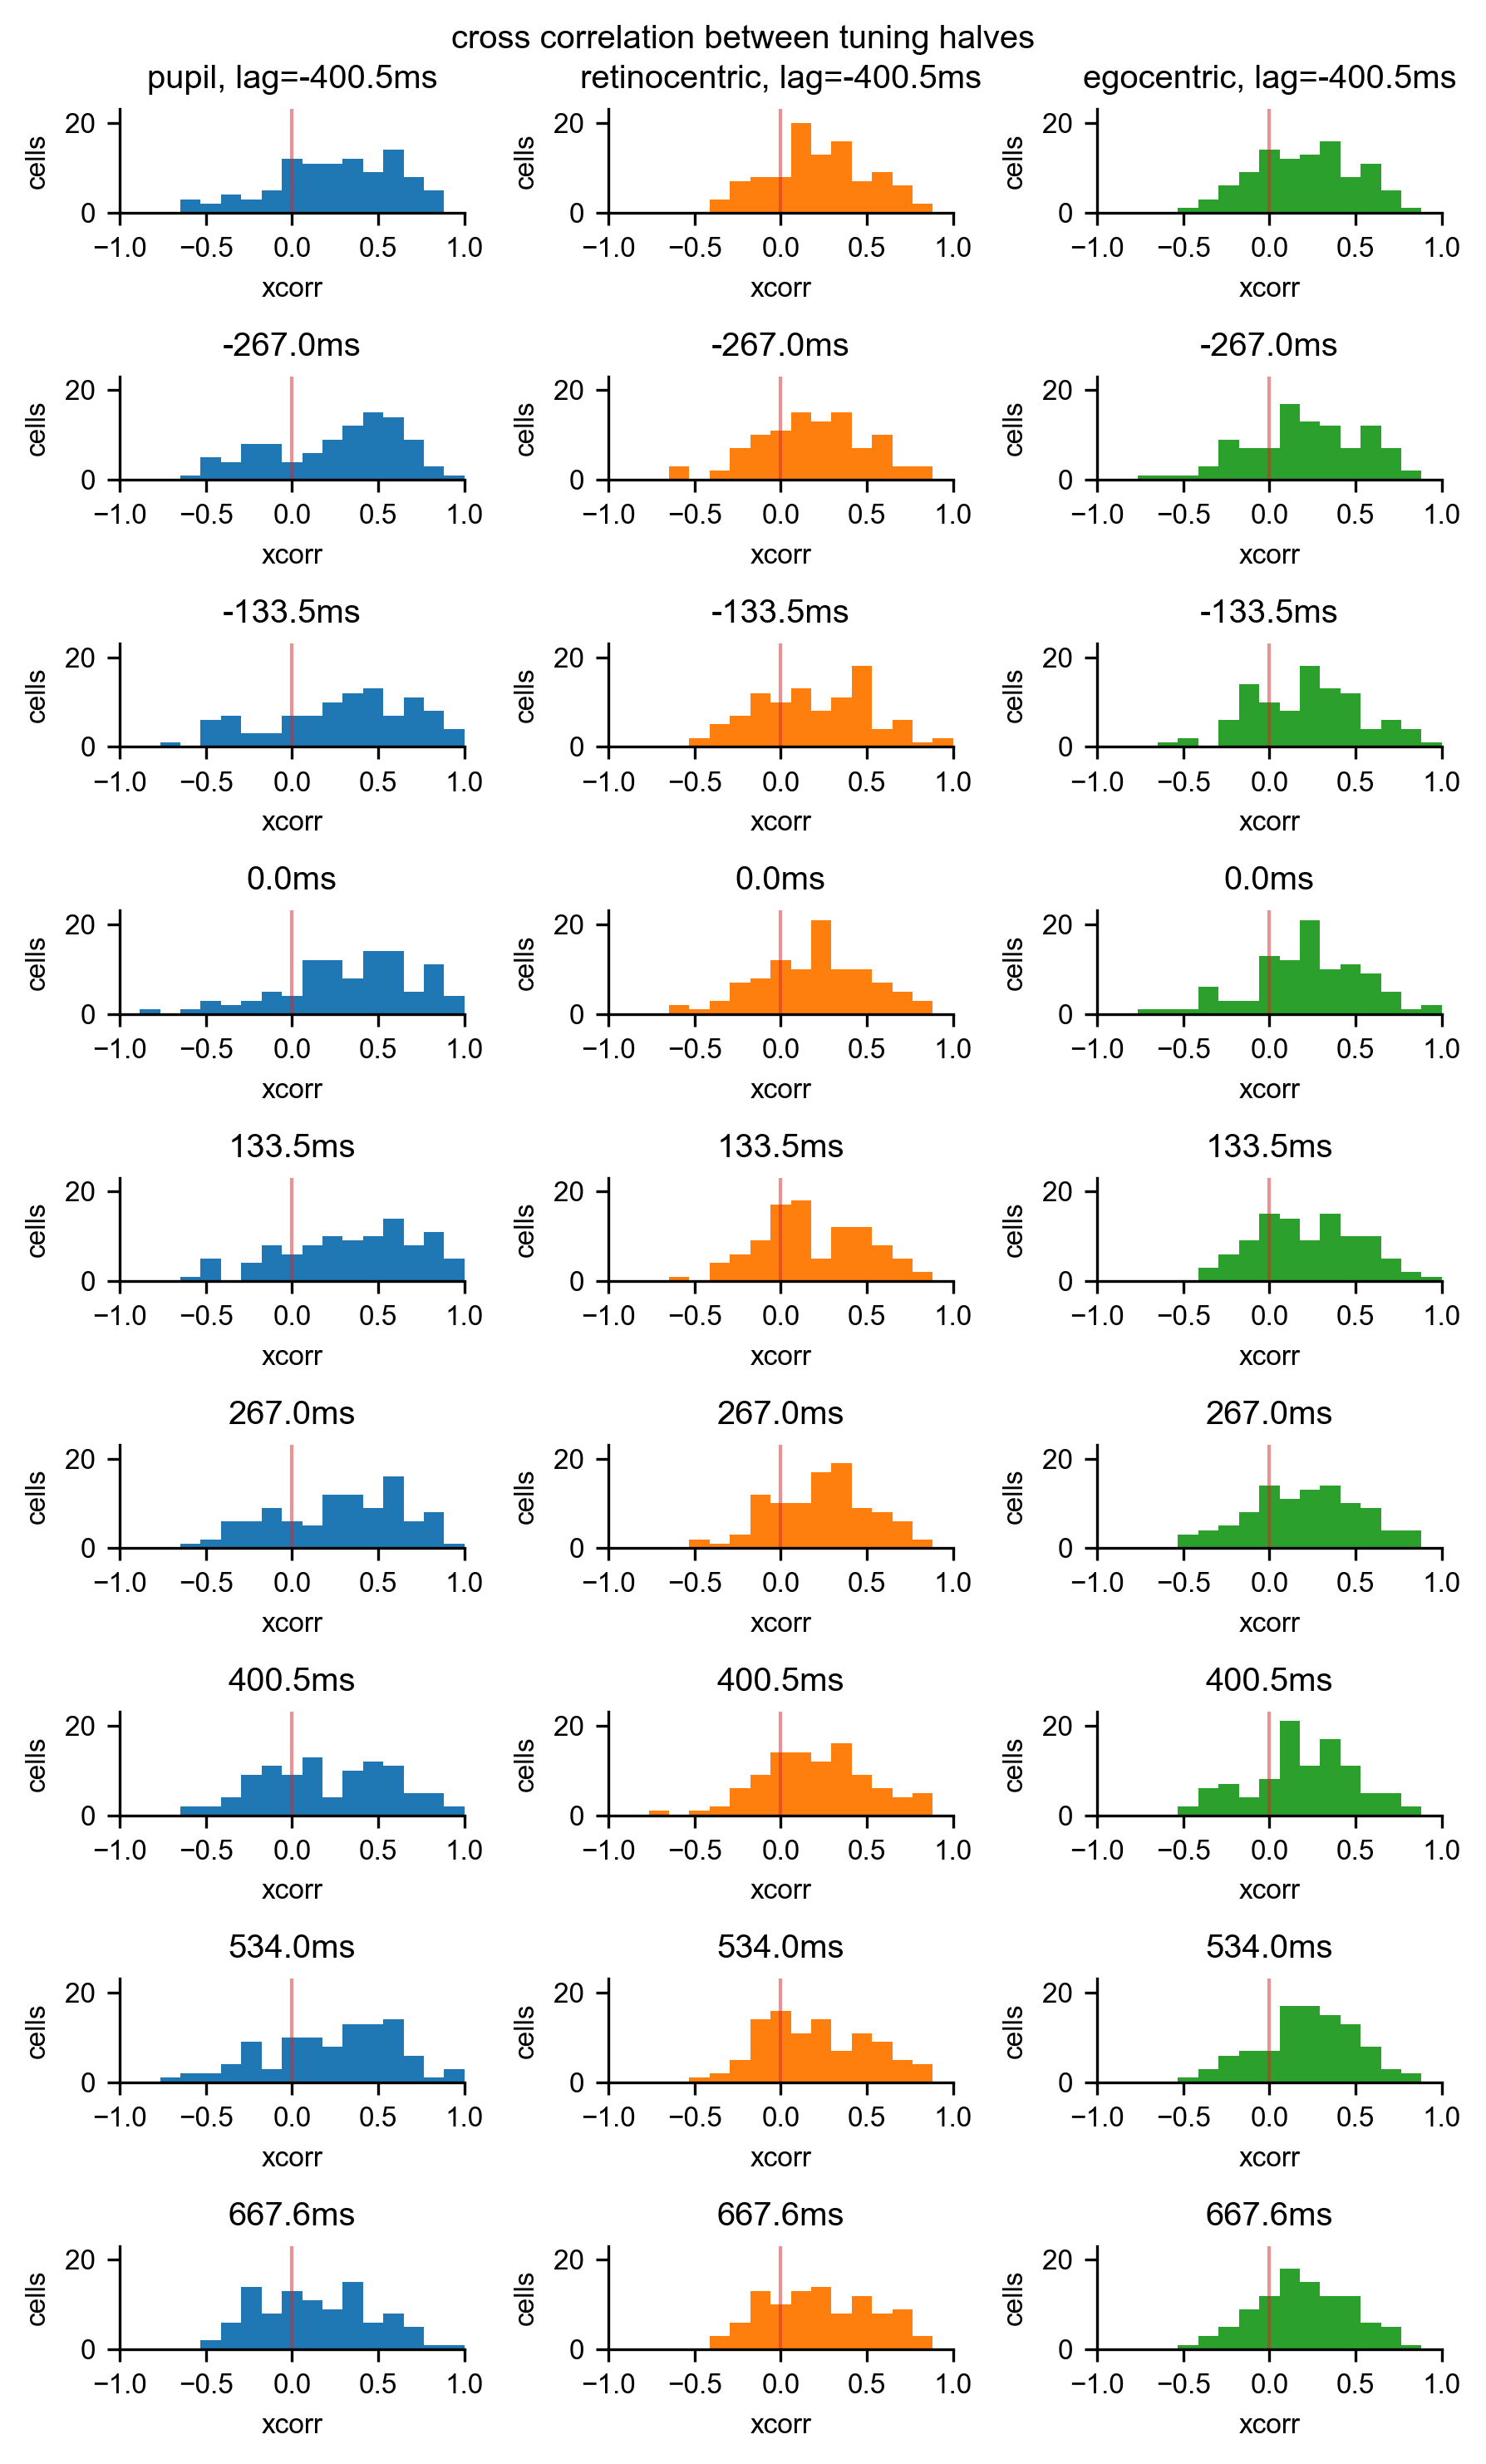

In [172]:
colcolors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(9,3, figsize=(6,10), dpi=300)
_setmax = 0
for lag_i, lagval in enumerate(lag_vals):
    lagval = (1/7.49) * 1000 * lagval

    h = axs[lag_i,0].hist(pupil_xcorr[:,lag_i], color='tab:blue', bins=np.linspace(-1,1,18))
    if np.nanmax(h[0]) > _setmax:
        _setmax = np.nanmax(h[0])
    h = axs[lag_i,1].hist(retino_xcorr[:,lag_i], color='tab:orange', bins=np.linspace(-1,1,18))
    if np.nanmax(h[0]) > _setmax:
        _setmax = np.nanmax(h[0])
    h = axs[lag_i,2].hist(ego_xcorr[:,lag_i], color='tab:green', bins=np.linspace(-1,1,18))
    if np.nanmax(h[0]) > _setmax:
        _setmax = np.nanmax(h[0])

    for col in range(3):    
        axs[lag_i,col].set_title('{:.4}ms'.format(lagval))
axs[0,0].set_title('pupil, lag={:.4}ms'.format((1/7.49) * 1000 * lag_vals[0]))
axs[0,1].set_title('retinocentric, lag={:.4}ms'.format((1/7.49) * 1000 * lag_vals[0]))
axs[0,2].set_title('egocentric, lag={:.4}ms'.format((1/7.49) * 1000 * lag_vals[0]))

axs = axs.flatten()
for ax in axs:
    ax.set_xlim([-1,1])
    ax.set_ylim([0,_setmax*1.1])
    ax.vlines(0, 0, _setmax*1.1, color='tab:red', alpha=0.5, lw=1)
    ax.set_xlabel('xcorr')
    ax.set_ylabel('cells')
fig.suptitle('cross correlation between tuning halves')
fig.tight_layout()

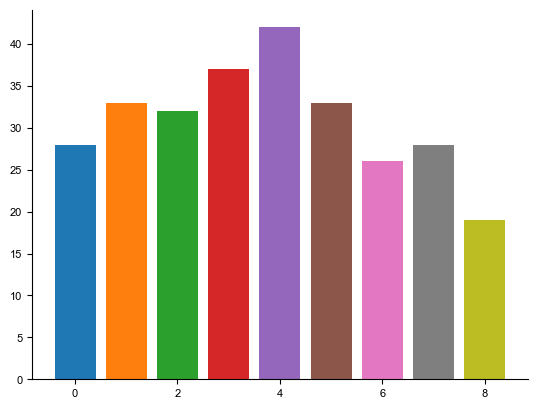

In [176]:
for lag_i, lagval in enumerate(lag_vals):
    lagval = (1/7.49) * 1000 * lagval

    plt.bar(lag_i, )



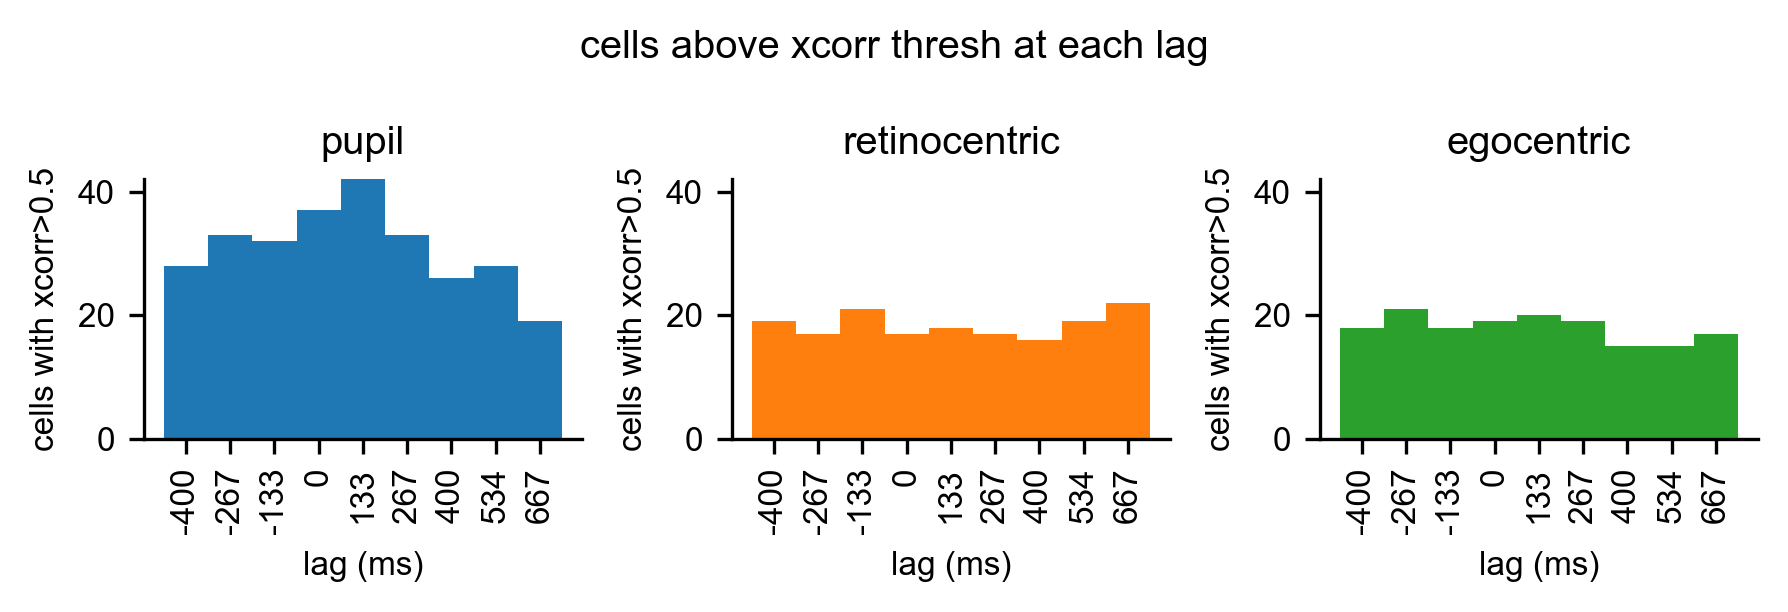

In [182]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(6,2), dpi=300)
_setmax = 0
for lag_i, lagval in enumerate(lag_vals):
    ax1.bar(lag_i, np.sum(pupil_xcorr[:,lag_i]>0.5), width=1, color='tab:blue')
    ax2.bar(lag_i, np.sum(retino_xcorr[:,lag_i]>0.5), width=1, color='tab:orange')
    ax3.bar(lag_i, np.sum(ego_xcorr[:,lag_i]>0.5), width=1, color='tab:green')

    for x in [np.sum(pupil_xcorr[:,lag_i]>0.5), np.sum(retino_xcorr[:,lag_i]>0.5), np.sum(ego_xcorr[:,lag_i]>0.5)]:
        if x>_setmax:
            _setmax = x

ax1.set_title('pupil')
ax2.set_title('retinocentric')
ax3.set_title('egocentric')
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('lag (ms)')
    ax.set_ylabel('cells with xcorr>0.5')
    ax.set_ylim([0,_setmax])
    ax.set_xticks(np.arange(len(lag_vals)), labels=[int((1/7.49) * 1000 * l) for l in lag_vals], rotation=90)
fig.suptitle('cells above xcorr thresh at each lag')
fig.tight_layout()

NameError: name 'lag_vals' is not defined

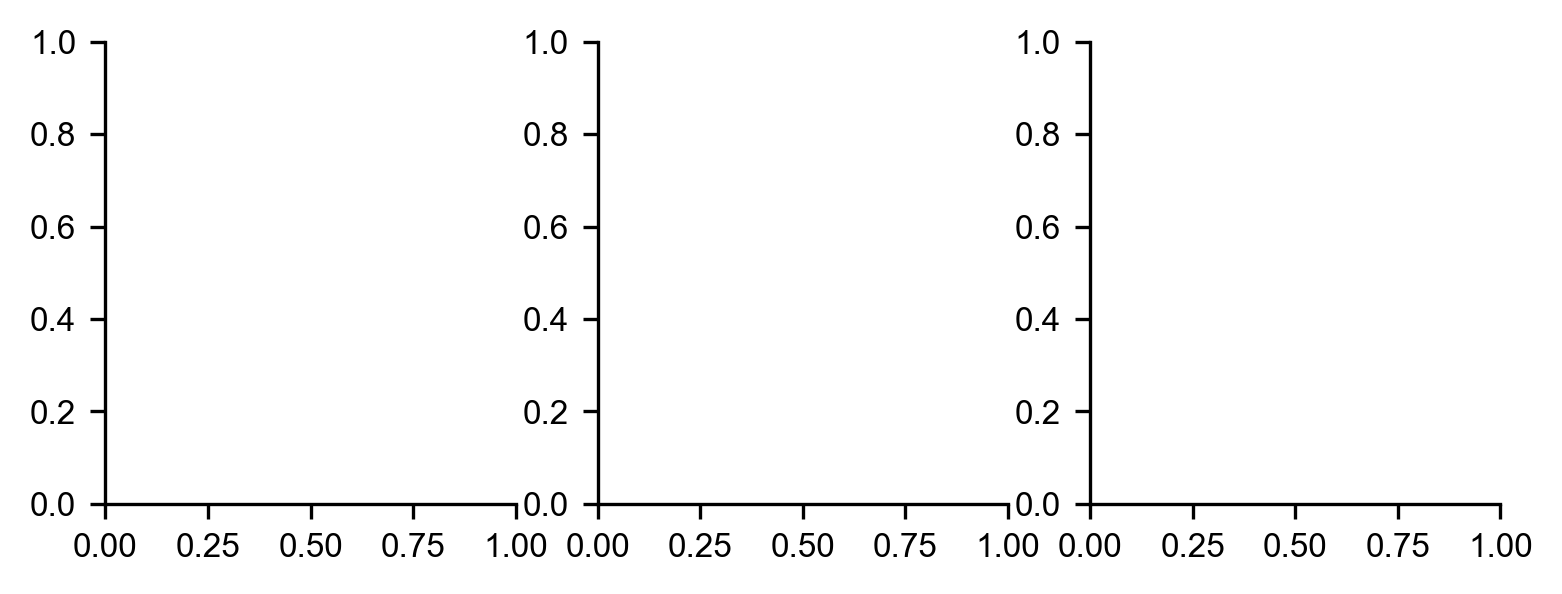

In [7]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(6,2), dpi=300)
_setmax = 0
for lag_i, lagval in enumerate(lag_vals):
    ax1.bar(lag_i, np.sum(all_mods[:,lag_i,0,0]>0.33), width=1, color='tab:blue')
    ax2.bar(lag_i, np.sum(all_mods[:,lag_i,1,0]>0.33), width=1, color='tab:orange')
    ax3.bar(lag_i, np.sum(all_mods[:,lag_i,2,0]>0.33), width=1, color='tab:green')
    for i in range(3):
        if np.sum(all_mods[:,lag_i,i,0]>0.33) > _setmax:
            _setmax = np.sum(all_mods[:,lag_i,i,0]>0.33)
ax1.set_title('pupil')
ax2.set_title('retinocentric')
ax3.set_title('egocentric')
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('lag (ms)')
    ax.set_ylabel('cells with cc>0.33')
    ax.set_ylim([0,_setmax])
    ax.set_xticks(np.arange(len(lag_vals)), labels=[int((1/7.49) * 1000 * l) for l in lag_vals], rotation=90)
fig.suptitle('cells above xcorr thresh per lag')
fig.tight_layout()

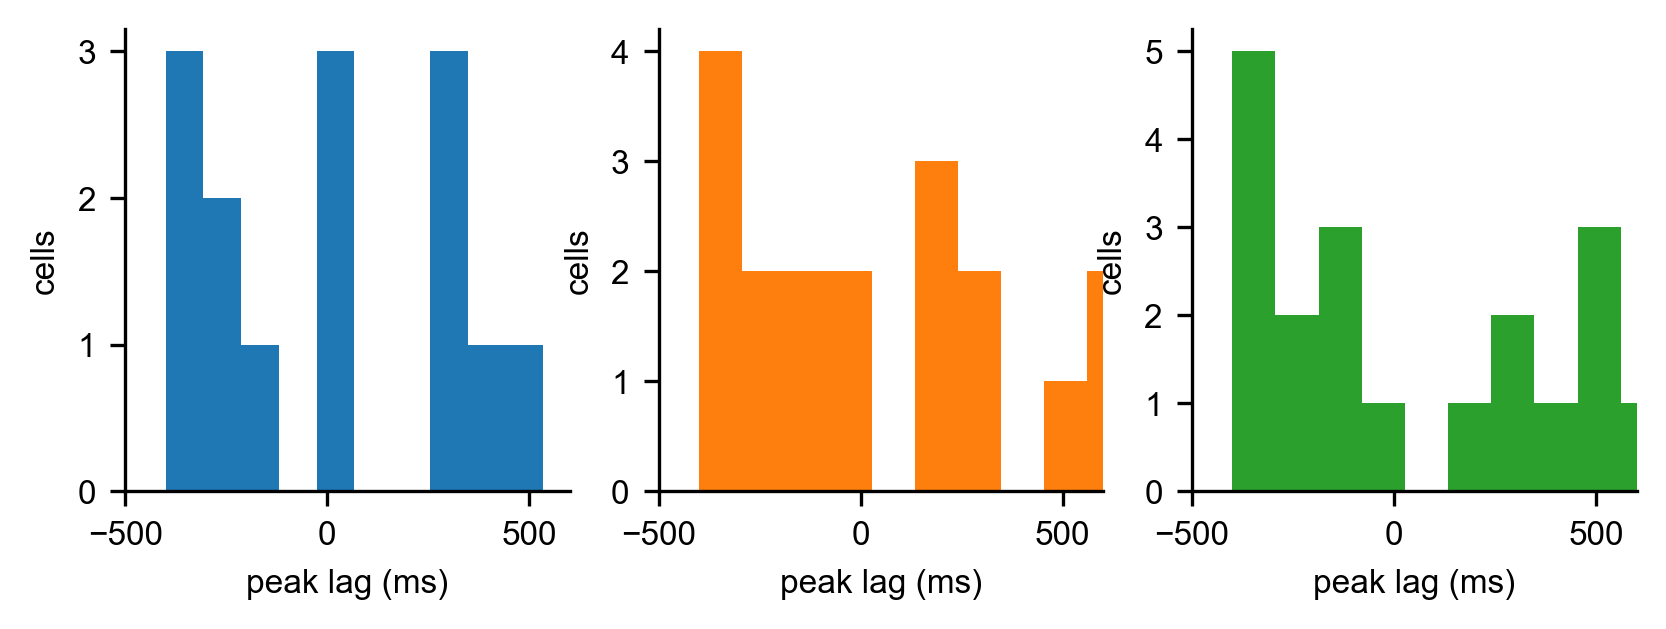

In [145]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(6.5,2), dpi=300)
for lag_i, lagval in enumerate(lag_vals):
    ax1.hist(response_peak[:,0]  * ((1/7.49) * 1000), color='tab:blue')
    ax2.hist(response_peak[:,1]  * ((1/7.49) * 1000), color='tab:orange')
    ax3.hist(response_peak[:,2]  * ((1/7.49) * 1000), color='tab:green')
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('peak lag (ms)')
    ax.set_ylabel('cells')
    ax.set_xlim([-500,600])
#     ax.set_xticks(np.arange(len(lag_vals)), labels=[int((1/7.49) * 1000 * l) for l in lag_vals], rotation=90)

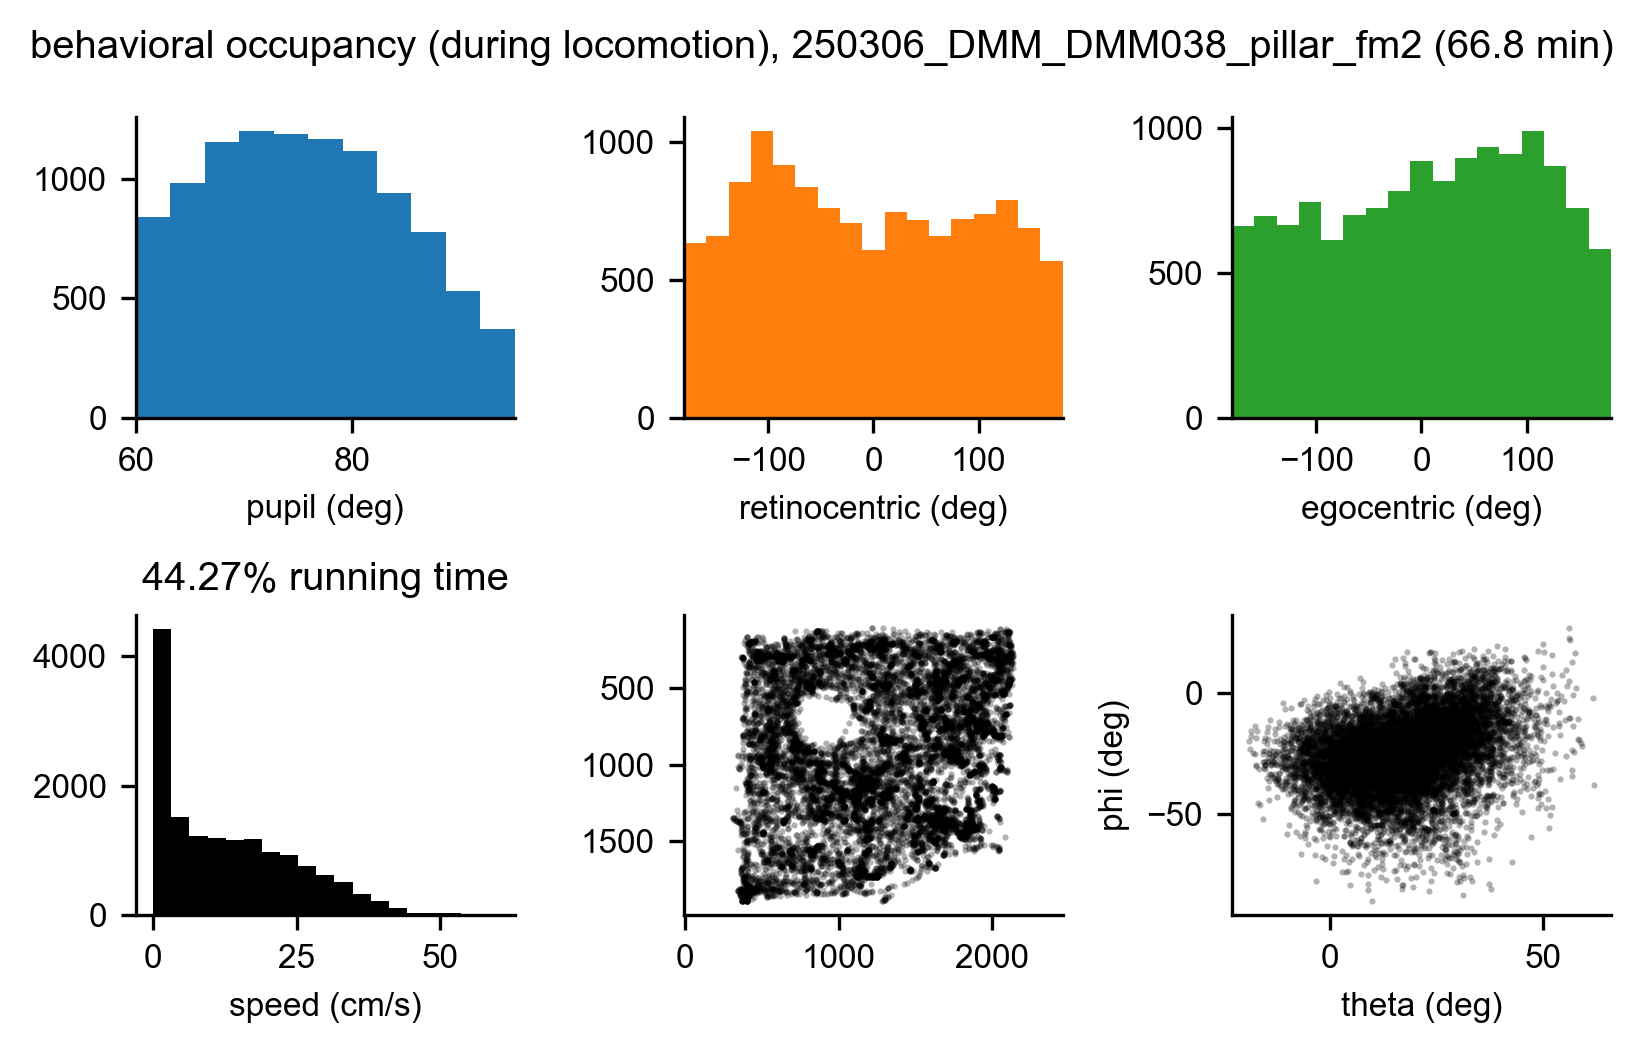

In [31]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2, 3, dpi=300, figsize=(5.5,3.5))

ax1.hist(data['pupil_from_head'][use], bins=pupil_bins, color='tab:blue')
ax1.set_xlabel('pupil (deg)')
ax1.set_xlim([pupil_bins[0], pupil_bins[-1]])

ax2.hist(data['retinocentric'][use], bins=retino_bins, color='tab:orange')
ax2.set_xlabel('retinocentric (deg)')
ax2.set_xlim([retino_bins[0], retino_bins[-1]])

ax3.hist(data['egocentric'][use], bins=ego_bins, color='tab:green')
ax3.set_xlabel('egocentric (deg)')
ax3.set_xlim([ego_bins[0], ego_bins[-1]])

speed = data['speed'].copy()
speed = np.append(speed, speed[-1])
use = speed > 1.

ax4.hist(speed, bins=np.linspace(0,60,20), color='k')
ax4.set_title('{:.4}% running time'.format((np.sum(use)/len(use))*100))
ax4.set_xlabel('speed (cm/s)')

ax5.plot(data['head_x'][use], data['head_y'][use], 'k.', ms=1, alpha=0.3)
ax5.invert_yaxis()
ax5.axis('equal')

ax6.plot(data['theta_interp'][use], data['phi_interp'][use], 'k.', ms=1, alpha=0.3)
ax6.set_xlabel('theta (deg)')
ax6.set_ylabel('phi (deg)')

fig.suptitle('behavioral occupancy (during locomotion), 250306_DMM_DMM038_pillar_fm2 ({:.3} min)'.format(data['twopT'][-1]/60))
fig.tight_layout()

In [8]:
import os

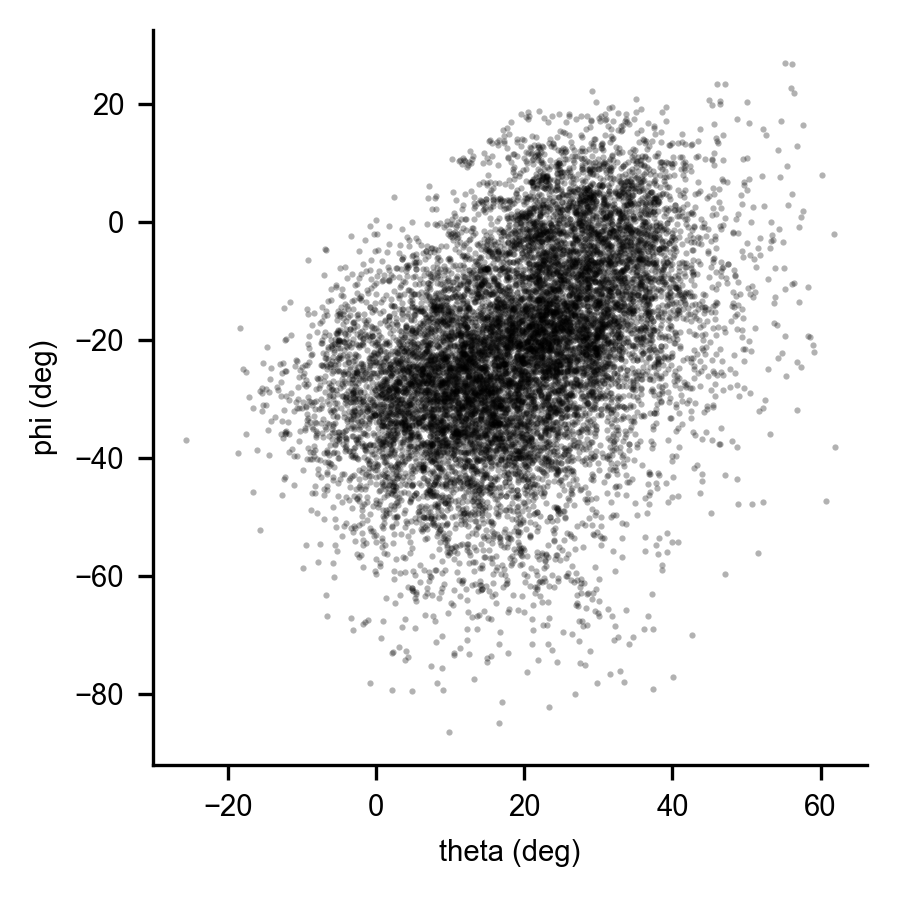

In [9]:
fig, ax6 = plt.subplots(1,1, dpi=300, figsize=(3,3))
ax6.plot(data['theta_interp'][use], data['phi_interp'][use], 'k.', ms=1, alpha=0.3)
ax6.set_xlabel('theta (deg)')
ax6.set_ylabel('phi (deg)')
fig.tight_layout()
fig.savefig('250306_DMM038_theta_v_phi.svg')

In [24]:
np.linspace(40, 95, 12)

array([40., 45., 50., 55., 60., 65., 70., 75., 80., 85., 90., 95.])

(7100.0, 7460.0)

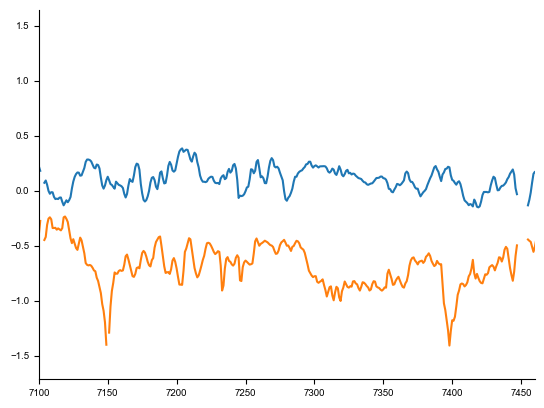

In [23]:
plt.plot(data['theta'])
plt.plot(data['phi'])
plt.xlim([startT,startT+(60*6)])

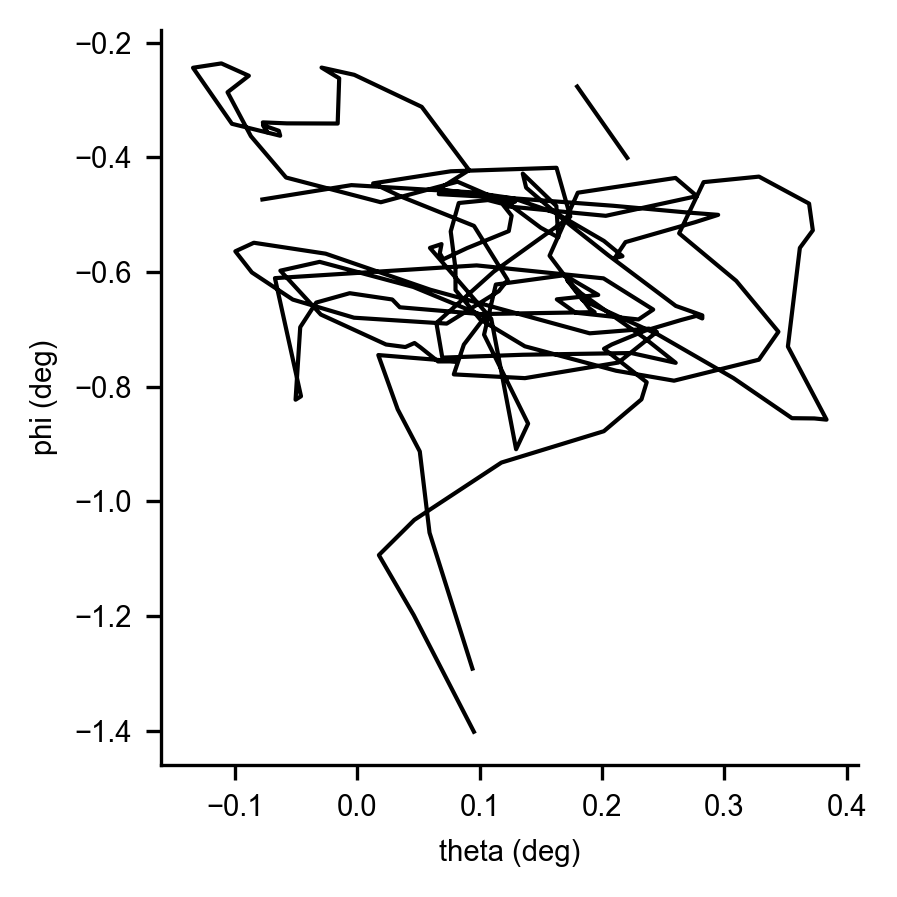

In [ ]:
fig, ax6 = plt.subplots(1,1, dpi=300, figsize=(3,3))
startT = 7100
endT = startT+(60*3)
for i in 
    ax6.plot(data['theta'][i], data['phi'][i], 'k-', lw=1, alpha=1)
ax6.set_xlabel('theta (deg)')
ax6.set_ylabel('phi (deg)')
fig.tight_layout()
# fig.savefig('250306_DMM038_theta_v_phi.svg')

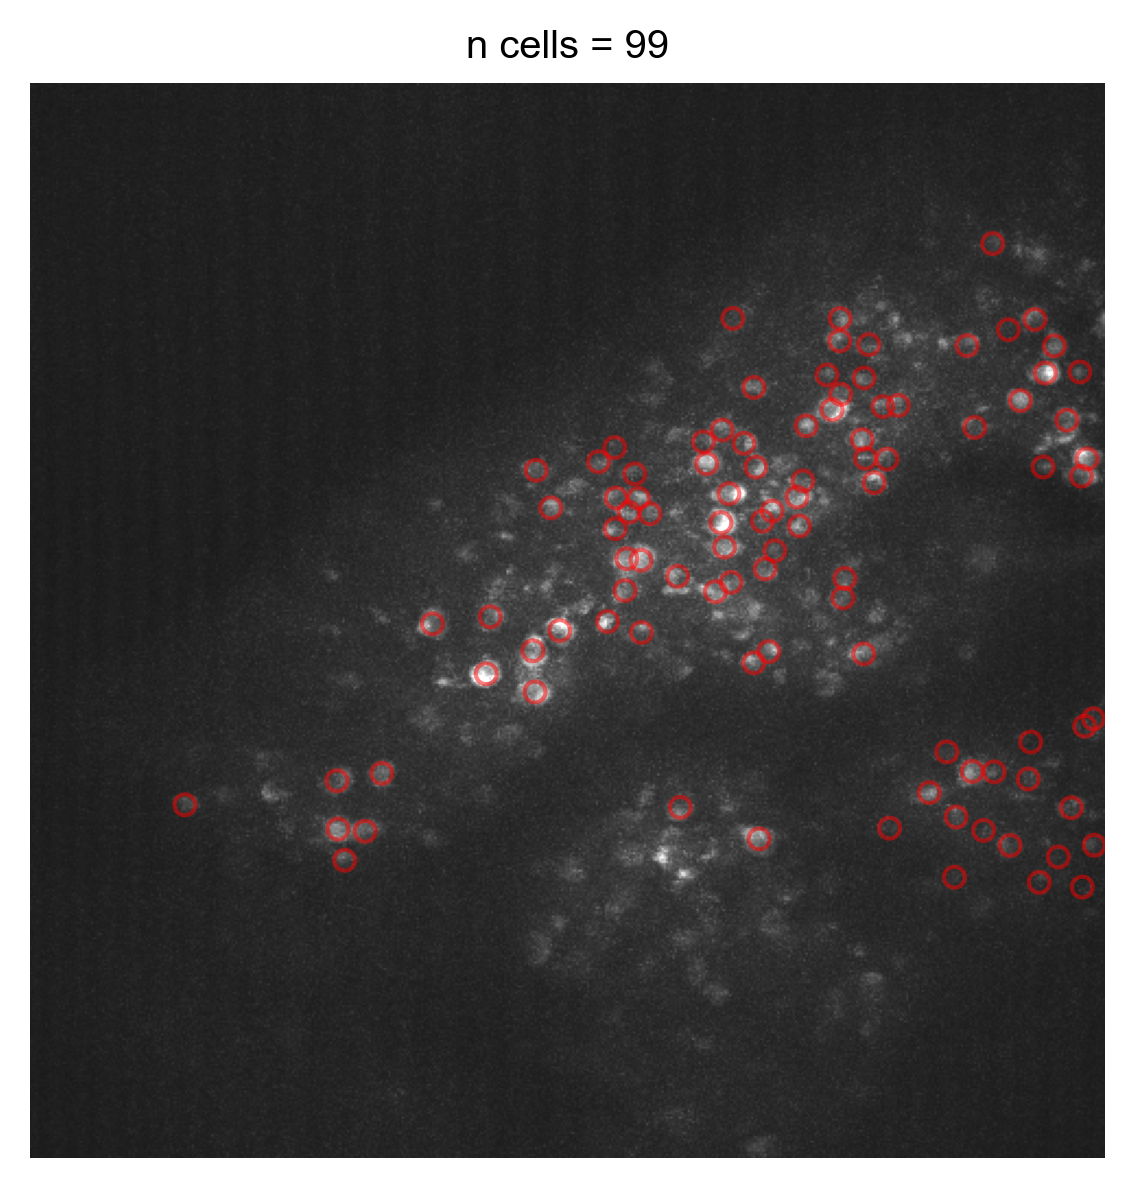

In [14]:
savepath = r'K:\Mini2P\250306_DMM_DMM038_pillar\fm2'
ops_path = os.path.join(savepath, 'suite2p\plane0\ops.npy')
stat_path = os.path.join(savepath, 'suite2p\plane0\stat.npy')
iscell_path = os.path.join(savepath, 'suite2p\plane0\iscell.npy')

ops = np.load(ops_path, allow_pickle=True)
stat = np.load(stat_path, allow_pickle=True)
iscell = np.load(iscell_path)
usecells = iscell[:,0]==1

fig, ax1 = plt.subplots(1,1, figsize=(4,4), dpi=300)
ax1.imshow(ops.item()['max_proj'], cmap='gray', vmin=0, vmax=500)
ax1.axis('off')
for cell in stat[usecells]:
    ax1.scatter(np.mean(cell['xpix'])-10, np.mean(cell['ypix'])-10, s=25, facecolors='none', edgecolors='r', alpha=0.5)
ax1.set_title('n cells = {}'.format(np.sum(usecells)))
fig.tight_layout()